# Lecture 20

## Generating Numbers from Probability Distributions: Box-Muller Method

The *Box–Muller method* is a way to generate Gaussian-distributed random numbers from uniformly distributed random numbers. Here, the transformation is given by

$y_{1} = \sqrt{-2 \ln x_1} \cos(2\pi x_2)$

$y_{2} = \sqrt{-2 \ln x_1} \sin(2\pi x_2)$

where $x_1, x_2 ~\epsilon~ [0, 1)$, and $y_1, y_2$ belong to the normal distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

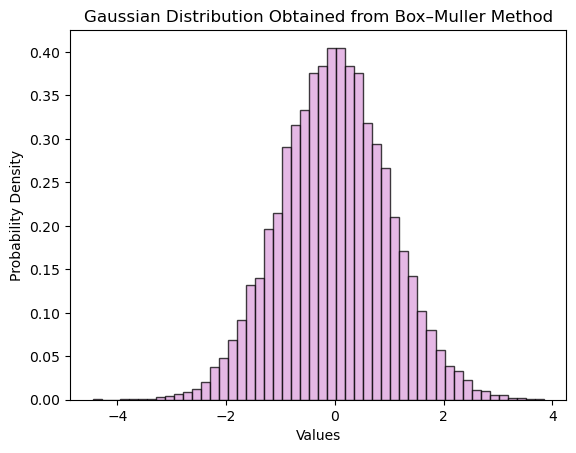

In [6]:
N = 10000

x1 = np.random.rand(N)
x2 = np.random.rand(N)

y1 = np.sqrt(-2 * np.log(x1)) * np.cos(2 * np.pi * x2)
y2 = np.sqrt(-2 * np.log(x1)) * np.sin(2 * np.pi * x2)

y = np.concatenate((y1, y2))

plt.hist(y, bins = 50, density = True, alpha = 0.75, color = 'plum', edgecolor = 'k')
plt.title('Gaussian Distribution Obtained from Box–Muller Method')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.show()

## Understanding How Noise Affects Data Fitting

Here, we are plotting noisy datasets to show how increasing noise introduces more scatter in the data.

### Algorithm Used:
1. Choose $a$ and $b$, and find $y = a + bx$
2. Set $\varepsilon = 10^{-6}$. Let $\eta$ be the uniform deviate ($0 \leq \eta < 1$) and convert it to the range $-5 \leq \eta \leq 5$.
3. So, for each $x_{i}$ data point we generate, we evaluate $y = a + bx + \varepsilon \eta$, do a linear fit and estimate the parameters $a$ and $b$
4. Vary $\varepsilon = 10^{-6}, 10^{-5}, ..., 10^{-2}$. We are essentially testing with noisy data (so more deviation)

In [20]:
a, b, eta = np.random.random(), np.random.random(), np.random.randn() # eta from a normal distribution
eps = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
x_arr = np.sort([np.random.random() for i in range(500)])

In [21]:
def data(ind):
    y_arr = []
    for j in x_arr:
        y = a + (b * j) + (eps[ind] * eta)
        y_arr.append(y)
    return y_arr

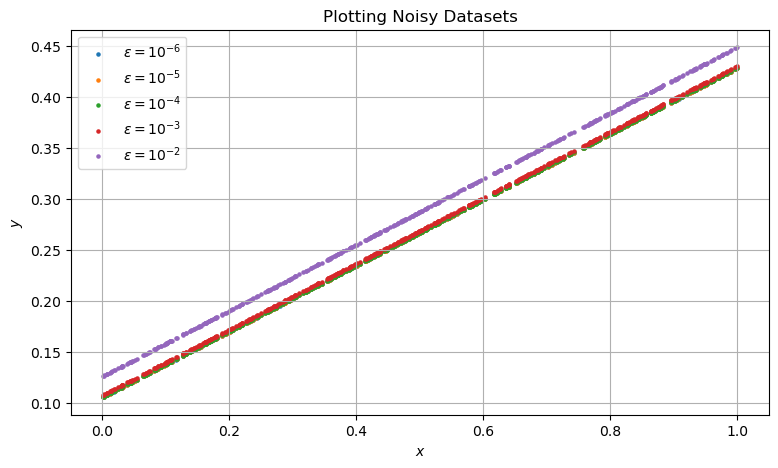

In [22]:
y_arr = [data(i) for i in range(len(eps))]
plt.figure(figsize=(9, 5))
plt.scatter(x_arr, y_arr[0], s = 5, label = r'$\epsilon = 10^{-6}$')
plt.scatter(x_arr, y_arr[1], s = 5, label = r'$\epsilon = 10^{-5}$')
plt.scatter(x_arr, y_arr[2], s = 5, label = r'$\epsilon = 10^{-4}$')
plt.scatter(x_arr, y_arr[3], s = 5, label = r'$\epsilon = 10^{-3}$')
plt.scatter(x_arr, y_arr[4], s = 5, label = r'$\epsilon = 10^{-2}$')
# m, c = np.polyfit(x_arr, y_arr, 1)
# plt.plot(x_arr, m*x_arr + c, '--', color = 'red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Plotting Noisy Datasets')
plt.grid(True)
plt.legend()
plt.show()

The noise is constant for all data points for a particular $\varepsilon$, so they have been vertically moved up or down.